# This notebook is for the purpose of model development

## Let's check to see that we can access CUDA GPU acceleration.

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
NVIDIA GeForce RTX 3080 Ti


## All good there. Let's now load our dataset.

In [2]:
# we need our custom class defined for pickle
class SyntheticEventDataset(torch.utils.data.Dataset):
    def __init__(self, csv_folder_path):
        pass
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

class CustomDatasetWrapper(torch.utils.data.Dataset):
    def __init__(self, original_dataset):
        self.original_dataset = original_dataset

    def __len__(self):
        return len(self.original_dataset)

    def __getitem__(self, idx):
        data, target = self.original_dataset[idx]
        
        # Unsqueeze the feature tensor to add the last dimension
        data = data.unsqueeze(-1)  # Add dimension at the end to make it (27500, 1)
        
        # Extract only the first value from the target tensor (if necessary)
        target = target[0] if isinstance(target, torch.Tensor) and target.dim() > 0 else target
        
        return data, target

train_dataset_cm = torch.load('PyTorch_Synthetic_Data/train_data_cm.pt', weights_only=False)
val_dataset_cm = torch.load('PyTorch_Synthetic_Data/validation_data_cm.pt', weights_only=False)
test_dataset_cm = torch.load('PyTorch_Synthetic_Data/test_data_cm.pt', weights_only=False)

In [3]:
class SubsetDataset(torch.utils.data.Dataset):
    def __init__(self, original_dataset, indices):
        self.original_dataset = original_dataset
        self.indices = indices

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        return self.original_dataset[self.indices[idx]]

# Define the indices for the first 1000 elements
subset_indices = list(range(10000))

# Create a subset of train_dataset_cm
train_dataset_subset = SubsetDataset(train_dataset_cm, subset_indices)

## With the dataset read in, let's define some DataLoaders.

In [4]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset_cm, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset_cm, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset_cm, batch_size=batch_size, shuffle=False)
sub_loader = DataLoader(train_dataset_subset, batch_size=batch_size, shuffle=True)

# Here we can see that our data is loading correctly
X, y = next(iter(train_loader))
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([32, 27500, 1])
Target shape: torch.Size([32])


## Excellent, with the data handling steps in place we can move on to building the neural net.

In [5]:
import torch
import torch.nn as nn

class LSTMNetwork(nn.Module):
    def __init__(self, hidden_size=8, bidirectional=False):
        super(LSTMNetwork, self).__init__()
        num_directions = 2 if bidirectional else 1
        
        # LSTM layers with proper batch normalization size
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn1 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm2 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn2 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm3 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn3 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm4 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn4 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm5 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn5 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm6 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn6 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm7 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=hidden_size, batch_first=True, bidirectional=bidirectional)
        self.bn7 = nn.BatchNorm1d(hidden_size * num_directions)
        
        self.lstm8 = nn.LSTM(input_size=hidden_size * num_directions, hidden_size=6, batch_first=True, bidirectional=bidirectional)
        self.bn8 = nn.BatchNorm1d(6)
        
        # Fully connected layers
        self.fc1 = nn.Linear(6, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 8)
        self.fc5 = nn.Linear(8, 8)
        self.fc6 = nn.Linear(8, 8)
        self.fc7 = nn.Linear(8, 8)
        self.fc8 = nn.Linear(8, 8)
        self.fc9 = nn.Linear(8, 1)
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.bn1(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm2(x)
        x = self.bn2(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm3(x)
        x = self.bn3(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm4(x)
        x = self.bn4(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm5(x)
        x = self.bn5(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm6(x)
        x = self.bn6(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm7(x)
        x = self.bn7(x.transpose(1, 2)).transpose(1, 2)
        
        x, _ = self.lstm8(x)
        x = self.bn8(x.transpose(1, 2)).transpose(1, 2)
        
        # Take only the last time step
        x = x[:, -1, :]
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        
        x = self.fc9(x)  # Final output layer
        
        return x

# Define model parameters
hidden_size = 8  # Adjust as needed
bidirectional = False  # Set to True for bidirectional LSTMs

# Initialize the model
model = LSTMNetwork(hidden_size=hidden_size, bidirectional=bidirectional)

print(model)
print(f"Num of params: {sum(p.numel() for p in model.parameters())}")


LSTMNetwork(
  (lstm1): LSTM(1, 8, batch_first=True)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm2): LSTM(8, 8, batch_first=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm3): LSTM(8, 8, batch_first=True)
  (bn3): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm4): LSTM(8, 8, batch_first=True)
  (bn4): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm5): LSTM(8, 8, batch_first=True)
  (bn5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm6): LSTM(8, 8, batch_first=True)
  (bn6): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm7): LSTM(8, 8, batch_first=True)
  (bn7): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm8): LSTM(8, 6, batch_first=True)
  (bn8): BatchNorm1d(6, eps=1e-05, momentum=0.1, af

## Define the hyper parameters for our model

In [6]:
learning_rate = 1e-5

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Define the training and validation loop

In [7]:
import time
from tqdm import tqdm

def train_model(data_loader, model, loss_function, optimizer, device="cuda"):
    """
    Train the model for one epoch.

    Args:
        data_loader (DataLoader): DataLoader for the training data.
        model (nn.Module): The PyTorch model to train.
        loss_function (nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        device (str): Device to use ('cpu' or 'cuda').
    """
    model.train()
    total_loss = 0
    num_batches = len(data_loader)

    progress_bar = tqdm(data_loader, desc="Training", leave=False)

    for X, y in progress_bar:
        # Move data and target to the specified device
        X, y = X.to(device), y.to(device)

        # Forward pass
        output = model(X)
        loss = loss_function(output, y.unsqueeze(1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss
        total_loss += loss.item()

        # Update progress bar with the current loss
        progress_bar.set_postfix({"Batch Loss": loss.item()})

    avg_loss = total_loss / num_batches
    #print(f"Train loss: {avg_loss:.4f}")
    return avg_loss

def validate_model(data_loader, model, loss_function, device="cuda"):
    """
    Evaluate the model on the test/validation data.

    Args:
        data_loader (DataLoader): DataLoader for the test/validation data.
        model (nn.Module): The PyTorch model to evaluate.
        loss_function (nn.Module): The loss function.
        device (str): Device to use ('cpu' or 'cuda').
    """
    model.eval()
    total_loss = 0
    num_batches = len(data_loader)

    progress_bar = tqdm(data_loader, desc="Validating", leave=False)

    with torch.no_grad():
        for X, y in progress_bar:
            # Move data and target to the specified device
            X, y = X.to(device), y.to(device)

            # Forward pass
            output = model(X)
            loss = loss_function(output, y.unsqueeze(1))

            # Track loss
            total_loss += loss.item()

            # Update progress bar with the current loss
            progress_bar.set_postfix({"Batch Loss": loss.item()})

    avg_loss = total_loss / num_batches
    #print(f"Validation loss: {avg_loss:.4f}")
    return avg_loss

Epoch 0
---------


Train Loss: 2088.2706 -|- Validation Loss: 2076.4203 -|- Epoch Time: 701.7391 seconds


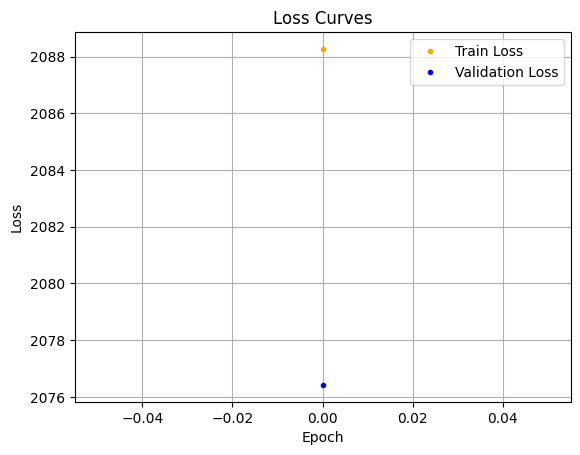


Epoch 1
---------


Train Loss: 2066.9975 -|- Validation Loss: 2031.1547 -|- Epoch Time: 699.5956 seconds


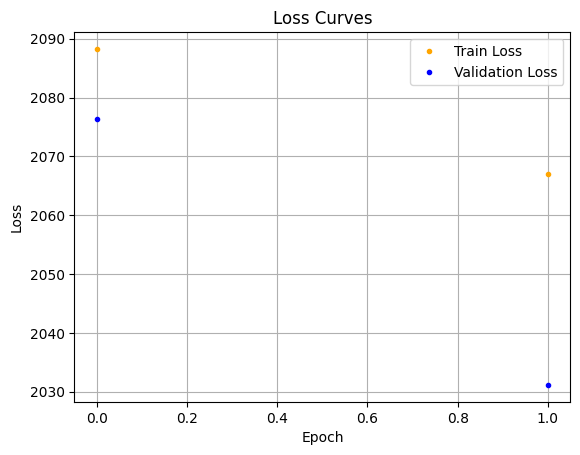


Epoch 2
---------


Train Loss: 1892.0907 -|- Validation Loss: 1608.7099 -|- Epoch Time: 699.4058 seconds


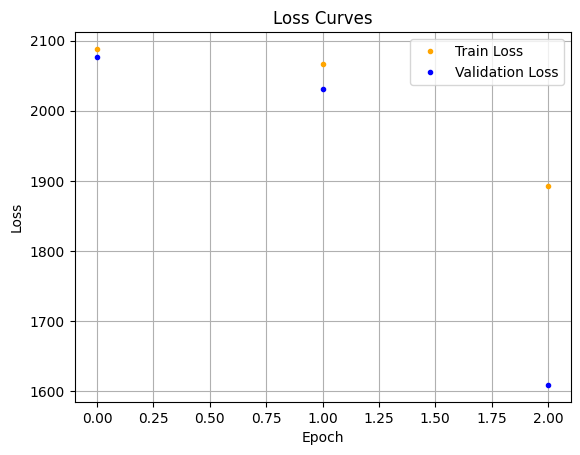


Epoch 3
---------


Train Loss: 1089.8285 -|- Validation Loss: 557.5760 -|- Epoch Time: 698.7322 seconds


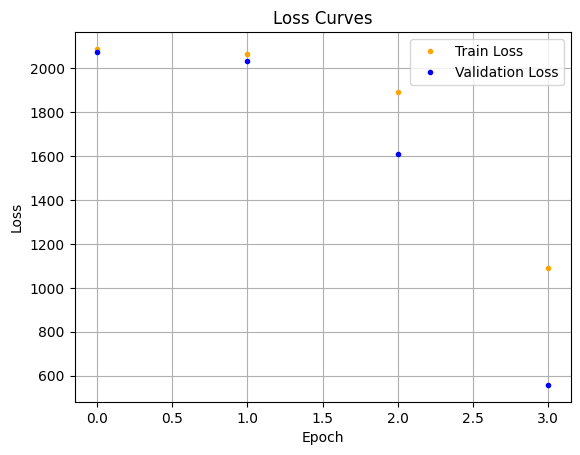


Epoch 4
---------


Train Loss: 470.5092 -|- Validation Loss: 405.5069 -|- Epoch Time: 698.7424 seconds


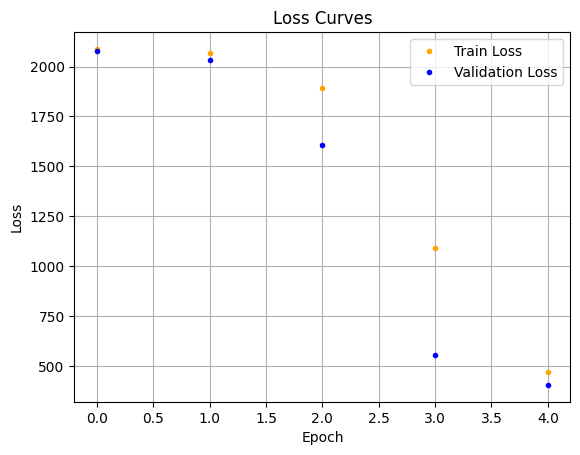


Epoch 5
---------


Train Loss: 393.3448 -|- Validation Loss: 377.7331 -|- Epoch Time: 699.3895 seconds


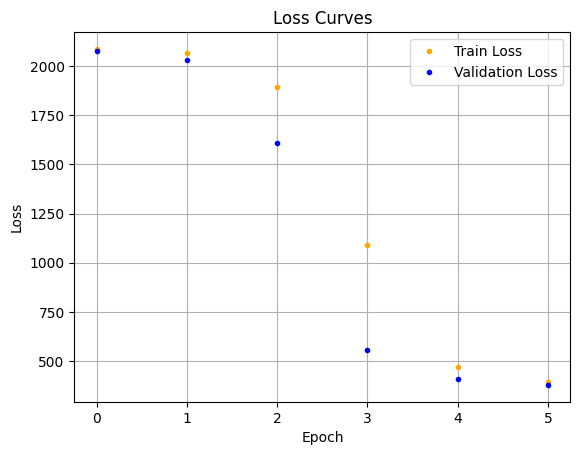


Epoch 6
---------


Train Loss: 373.6209 -|- Validation Loss: 357.1993 -|- Epoch Time: 700.0505 seconds


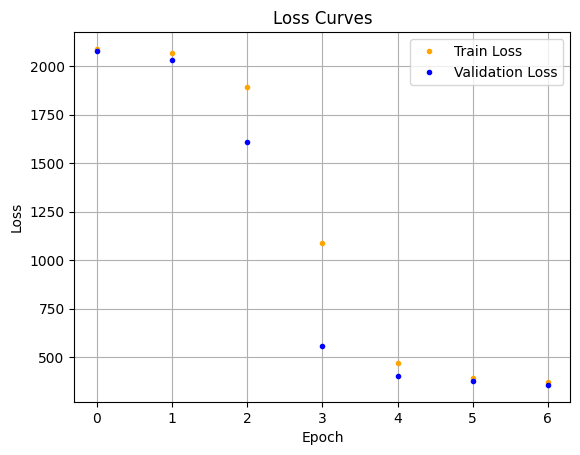


Epoch 7
---------


Train Loss: 366.5190 -|- Validation Loss: 353.6692 -|- Epoch Time: 700.4411 seconds


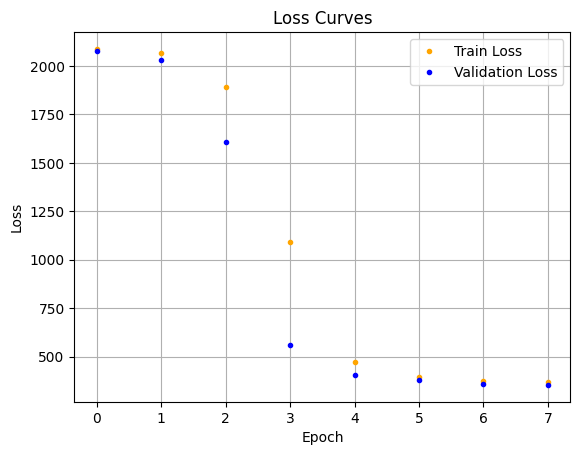


Epoch 8
---------


Train Loss: 359.7071 -|- Validation Loss: 352.7637 -|- Epoch Time: 700.7332 seconds


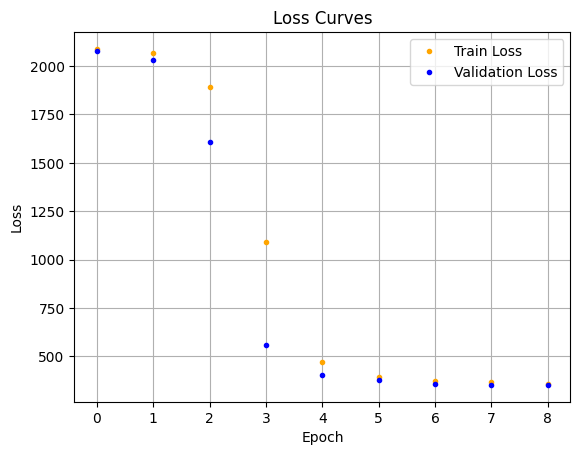


Epoch 9
---------


Train Loss: 355.0833 -|- Validation Loss: 349.2145 -|- Epoch Time: 701.0355 seconds


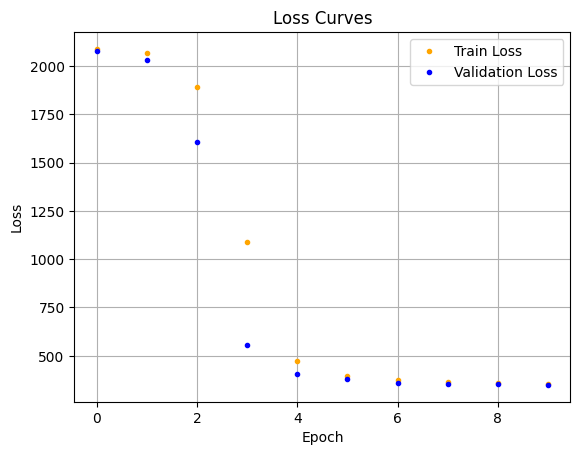


Epoch 10
---------


Train Loss: 351.5525 -|- Validation Loss: 349.2377 -|- Epoch Time: 700.9379 seconds


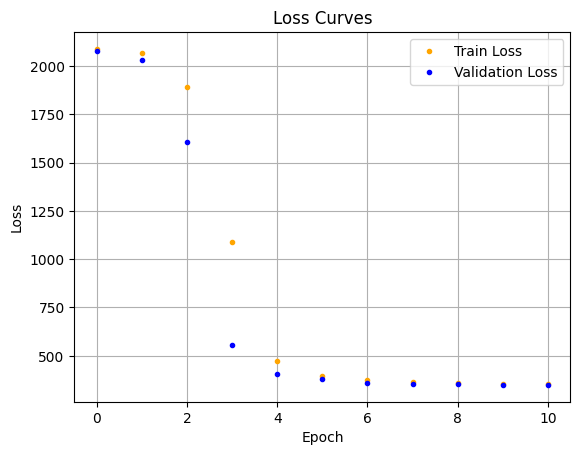


Epoch 11
---------


Train Loss: 349.0269 -|- Validation Loss: 344.2376 -|- Epoch Time: 700.8843 seconds


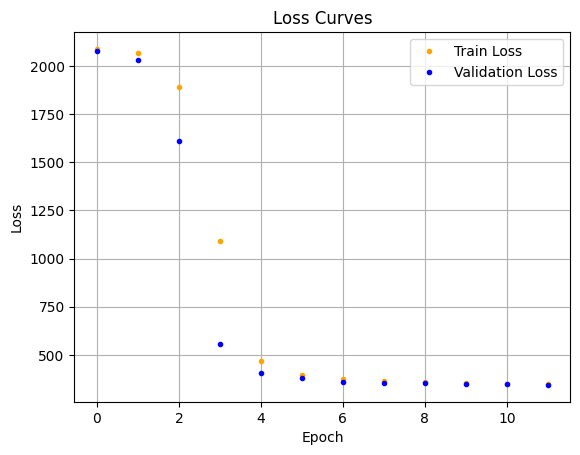


Epoch 12
---------


Train Loss: 346.2886 -|- Validation Loss: 344.7188 -|- Epoch Time: 700.7369 seconds


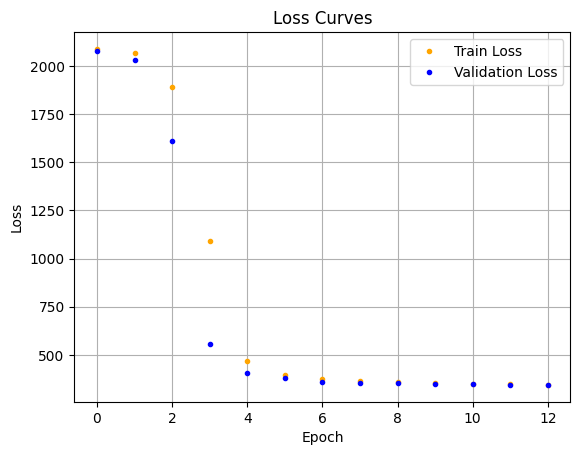


Epoch 13
---------


Train Loss: 342.9687 -|- Validation Loss: 341.6964 -|- Epoch Time: 700.6397 seconds


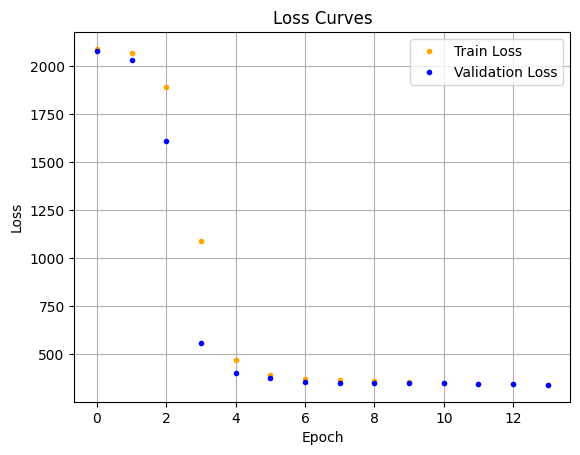


Epoch 14
---------


Train Loss: 340.0400 -|- Validation Loss: 338.8119 -|- Epoch Time: 700.4725 seconds


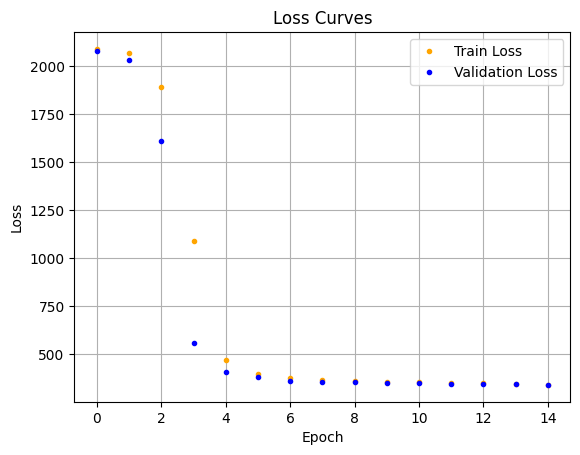


Epoch 15
---------


Train Loss: 334.4643 -|- Validation Loss: 333.9284 -|- Epoch Time: 700.2451 seconds


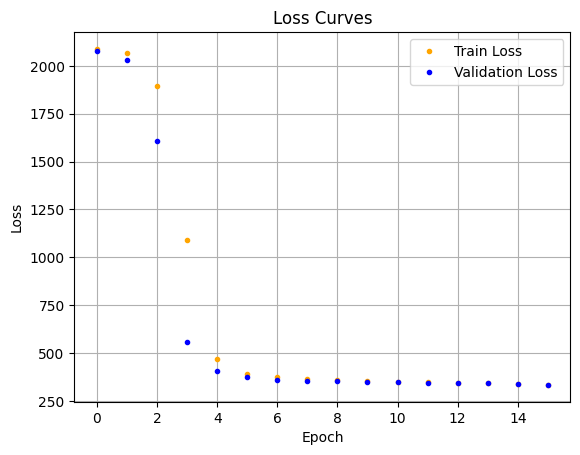


Epoch 16
---------


Train Loss: 326.9757 -|- Validation Loss: 324.6413 -|- Epoch Time: 699.7724 seconds


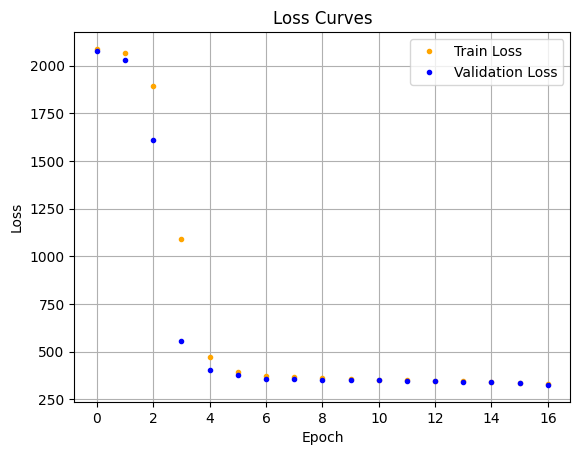


Epoch 17
---------


Train Loss: 320.7136 -|- Validation Loss: 318.4609 -|- Epoch Time: 699.6657 seconds


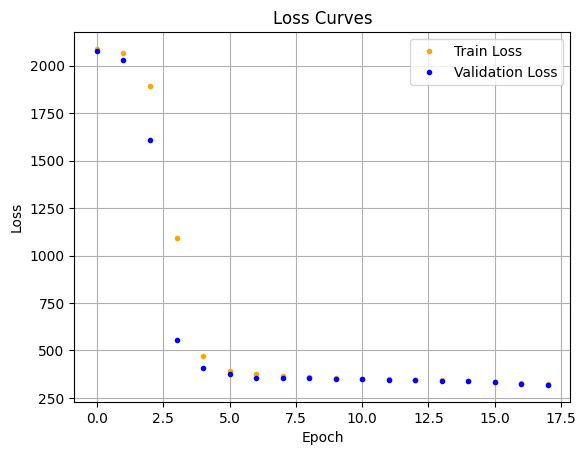


Epoch 18
---------


Train Loss: 316.5129 -|- Validation Loss: 316.0011 -|- Epoch Time: 699.6472 seconds


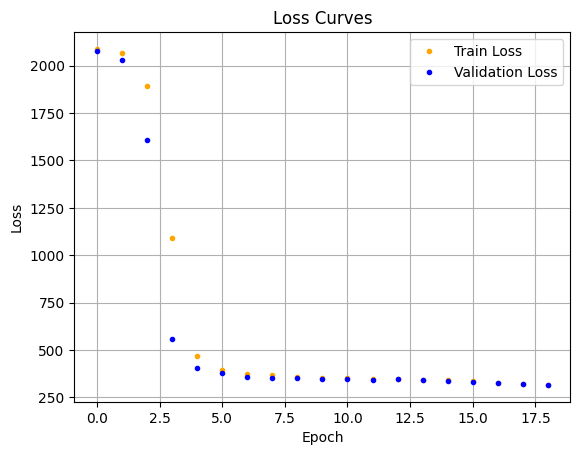


Epoch 19
---------


Train Loss: 314.7324 -|- Validation Loss: 314.5401 -|- Epoch Time: 699.6640 seconds


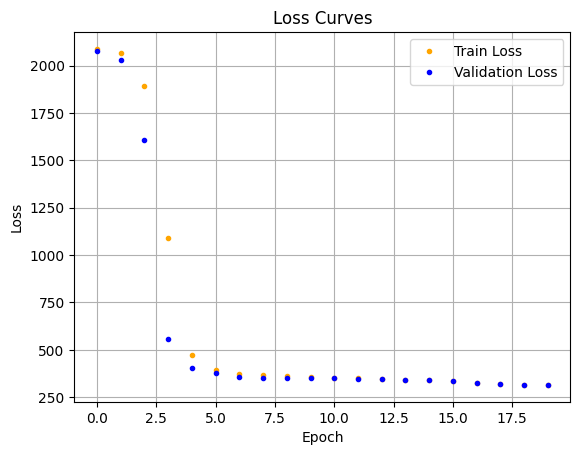


Epoch 20
---------


Train Loss: 312.5958 -|- Validation Loss: 313.7334 -|- Epoch Time: 699.6934 seconds


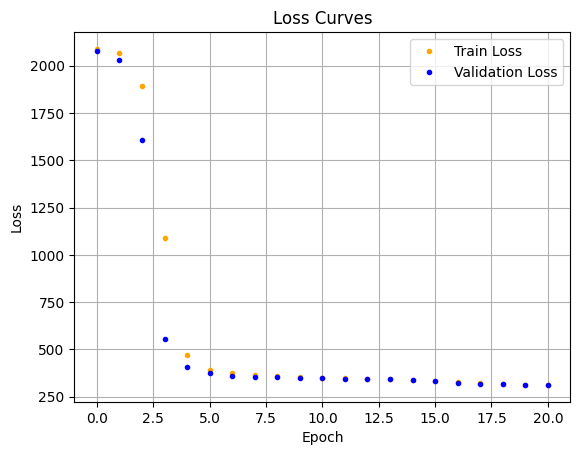


Epoch 21
---------


Train Loss: 311.2701 -|- Validation Loss: 311.5946 -|- Epoch Time: 699.7322 seconds


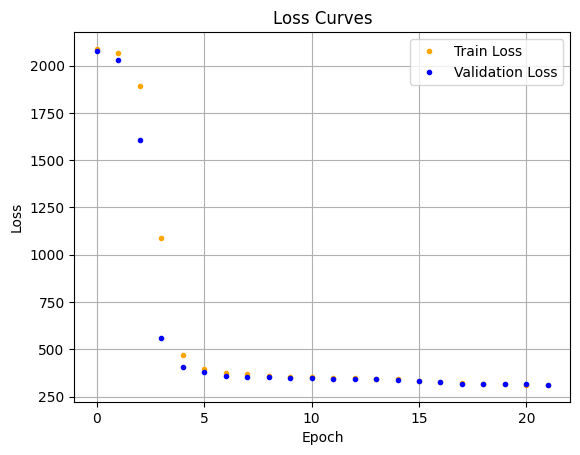


Epoch 22
---------


Train Loss: 310.0842 -|- Validation Loss: 310.9576 -|- Epoch Time: 699.9426 seconds


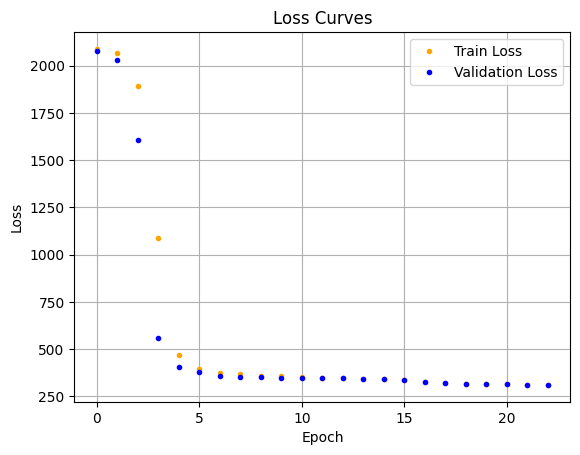


Epoch 23
---------


Train Loss: 308.7856 -|- Validation Loss: 310.0830 -|- Epoch Time: 699.9850 seconds


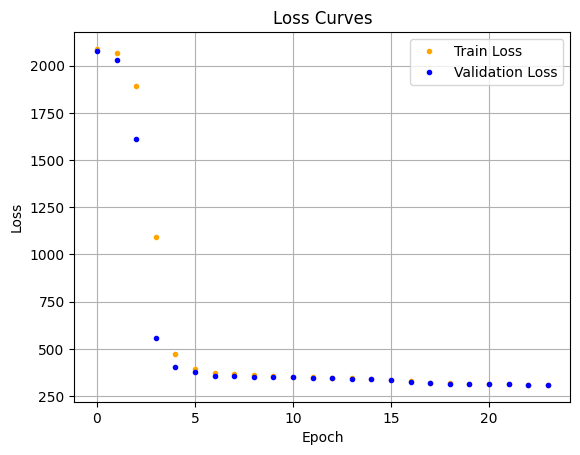


Epoch 24
---------


Train Loss: 307.9964 -|- Validation Loss: 309.9439 -|- Epoch Time: 700.0072 seconds


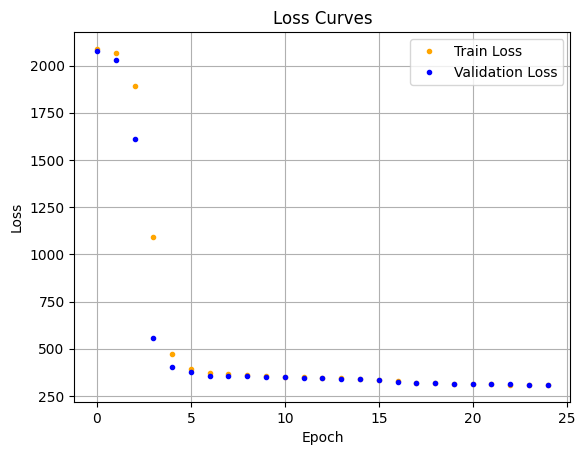


Epoch 25
---------


Train Loss: 307.2763 -|- Validation Loss: 309.2255 -|- Epoch Time: 700.0486 seconds


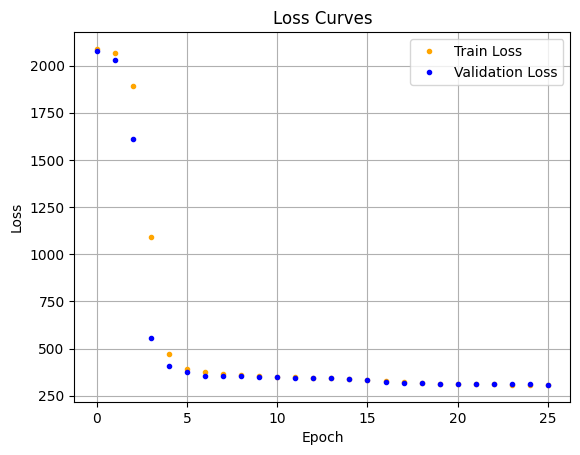


Epoch 26
---------


Train Loss: 306.3140 -|- Validation Loss: 308.7474 -|- Epoch Time: 700.1218 seconds


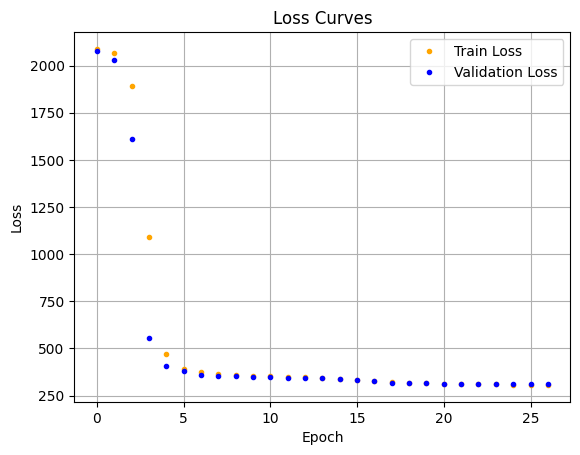


Epoch 27
---------


Train Loss: 306.0912 -|- Validation Loss: 310.2345 -|- Epoch Time: 700.2070 seconds


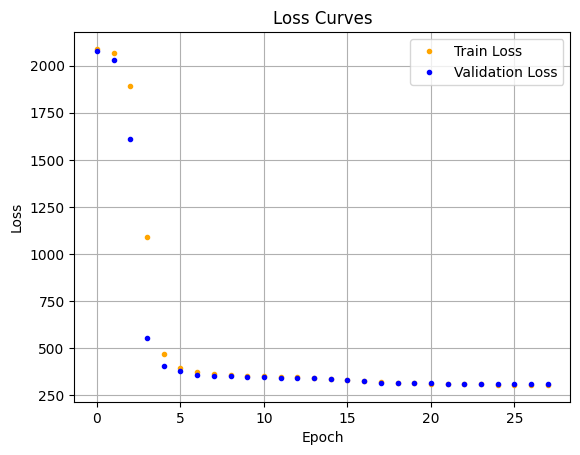


Epoch 28
---------


Train Loss: 305.6482 -|- Validation Loss: 309.3032 -|- Epoch Time: 700.8036 seconds


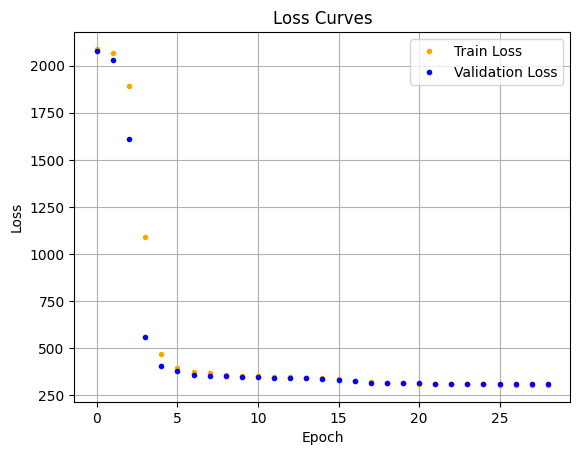


Epoch 29
---------


Train Loss: 304.9389 -|- Validation Loss: 307.3100 -|- Epoch Time: 700.8714 seconds


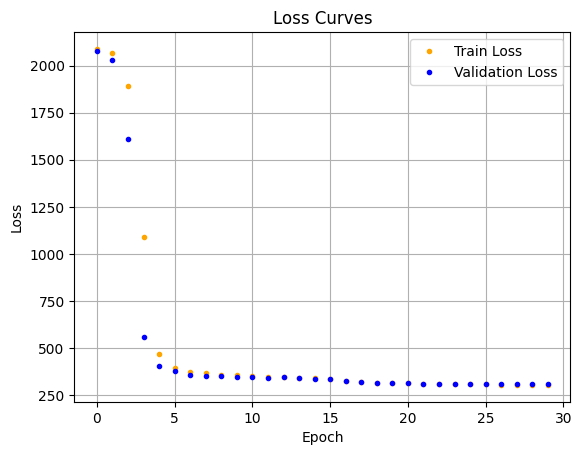


Epoch 30
---------


Train Loss: 304.6134 -|- Validation Loss: 307.5638 -|- Epoch Time: 700.1590 seconds


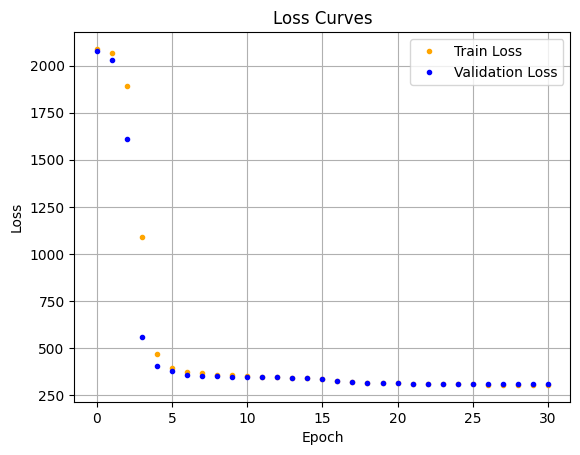


Epoch 31
---------


Train Loss: 303.8119 -|- Validation Loss: 306.8636 -|- Epoch Time: 700.6905 seconds


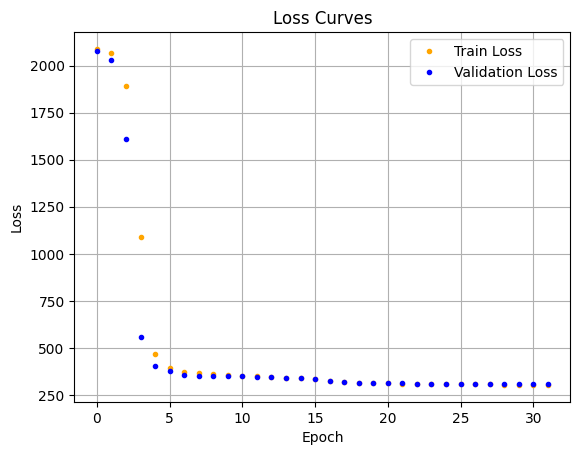


Epoch 32
---------


Train Loss: 303.6747 -|- Validation Loss: 306.6630 -|- Epoch Time: 700.8909 seconds


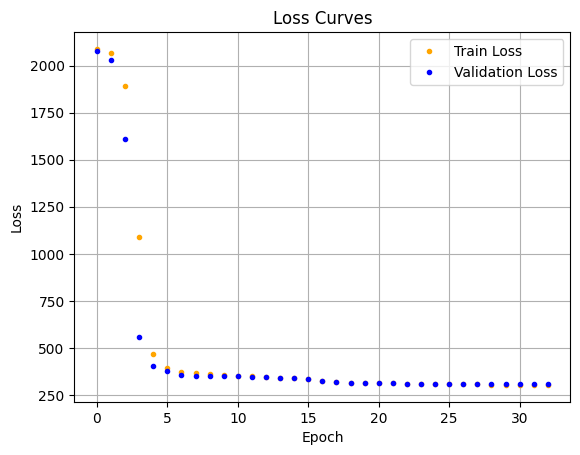


Epoch 33
---------


Train Loss: 303.6481 -|- Validation Loss: 306.6399 -|- Epoch Time: 700.9183 seconds


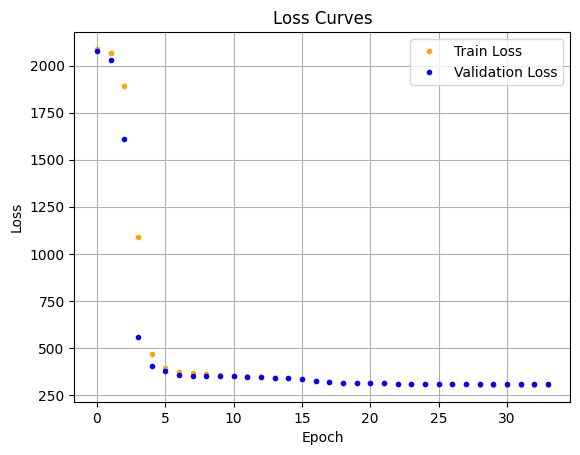


Epoch 34
---------


Train Loss: 303.1848 -|- Validation Loss: 306.0095 -|- Epoch Time: 701.0534 seconds


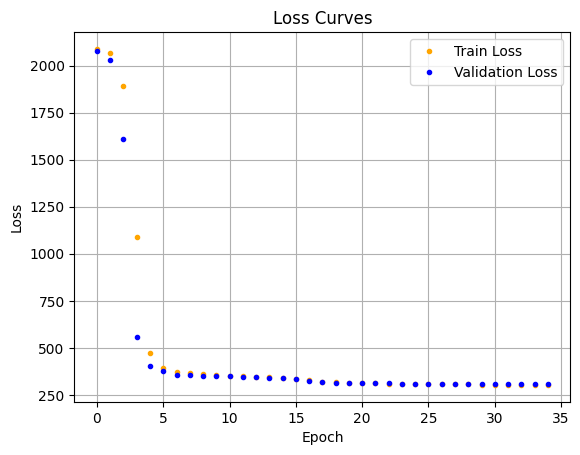


Epoch 35
---------


Train Loss: 302.6988 -|- Validation Loss: 305.6030 -|- Epoch Time: 701.2117 seconds


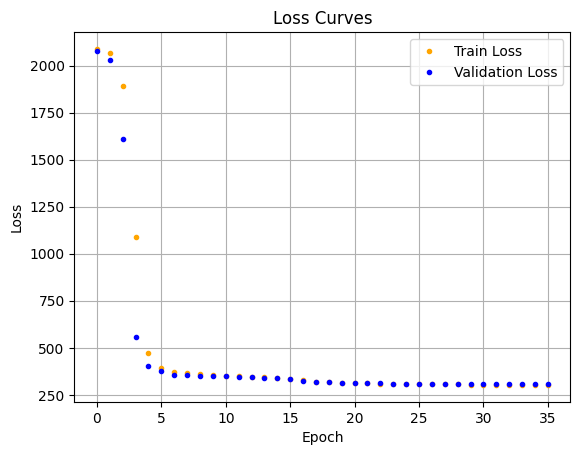


Epoch 36
---------


Train Loss: 302.7078 -|- Validation Loss: 305.4148 -|- Epoch Time: 701.1312 seconds


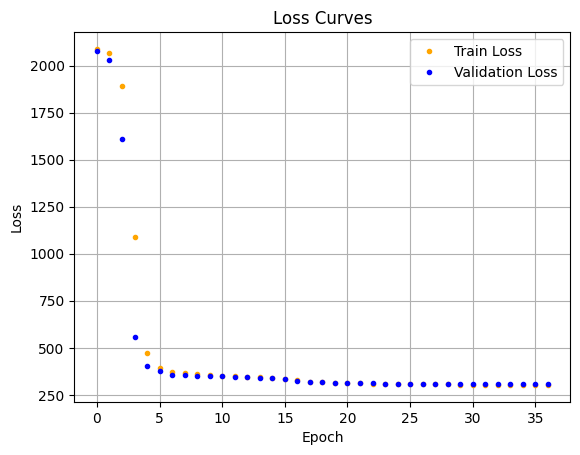


Epoch 37
---------


Train Loss: 302.3270 -|- Validation Loss: 305.9515 -|- Epoch Time: 701.1384 seconds


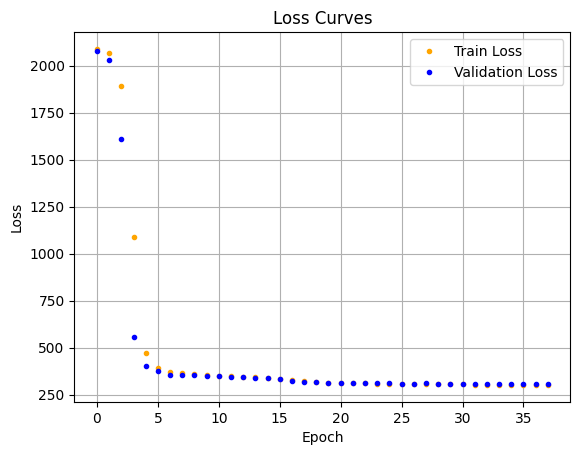


Epoch 38
---------


Train Loss: 302.0277 -|- Validation Loss: 306.3420 -|- Epoch Time: 701.2434 seconds


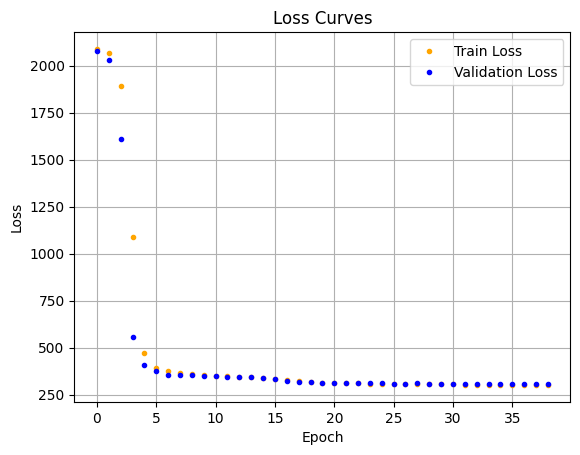


Epoch 39
---------


Train Loss: 301.7288 -|- Validation Loss: 305.1039 -|- Epoch Time: 701.2712 seconds


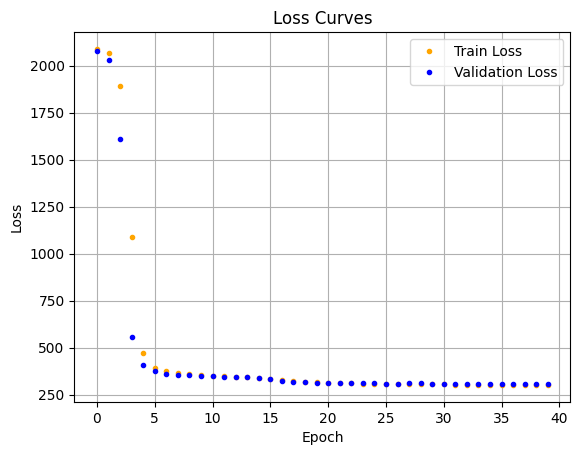


Epoch 40
---------


Train Loss: 301.5564 -|- Validation Loss: 304.9258 -|- Epoch Time: 701.3235 seconds


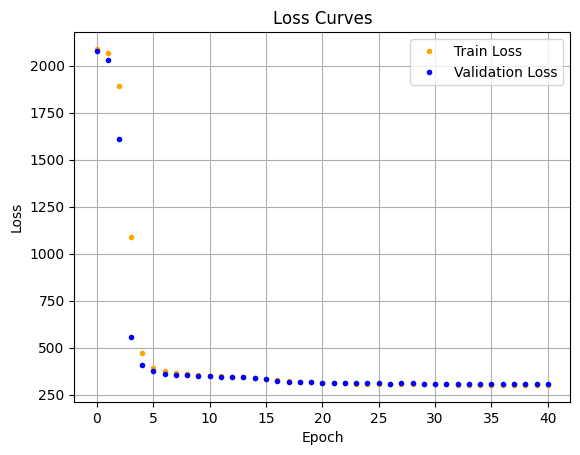


Epoch 41
---------


Train Loss: 301.2975 -|- Validation Loss: 304.6503 -|- Epoch Time: 701.3687 seconds


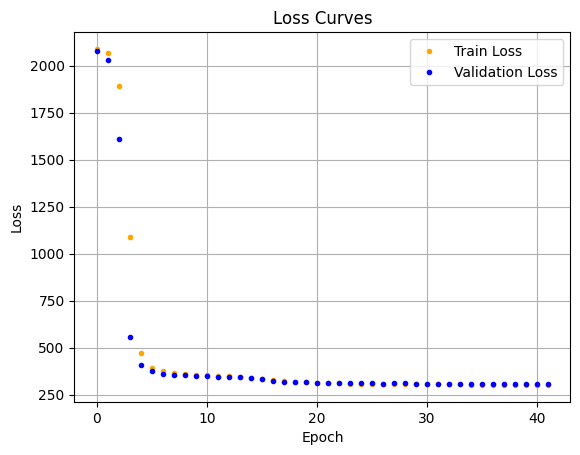


Epoch 42
---------


Train Loss: 301.0371 -|- Validation Loss: 304.4424 -|- Epoch Time: 701.4190 seconds


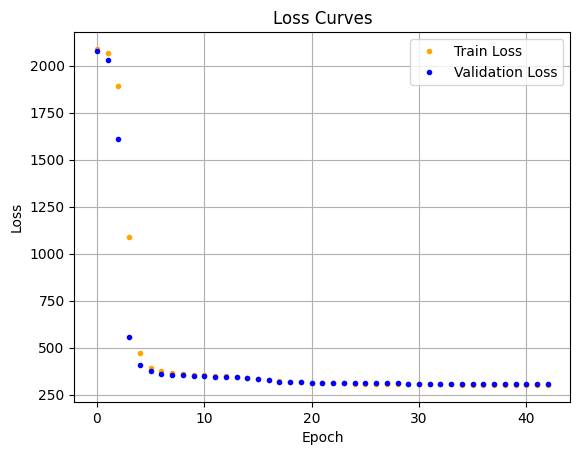


Epoch 43
---------


Train Loss: 300.8695 -|- Validation Loss: 304.8592 -|- Epoch Time: 701.4621 seconds


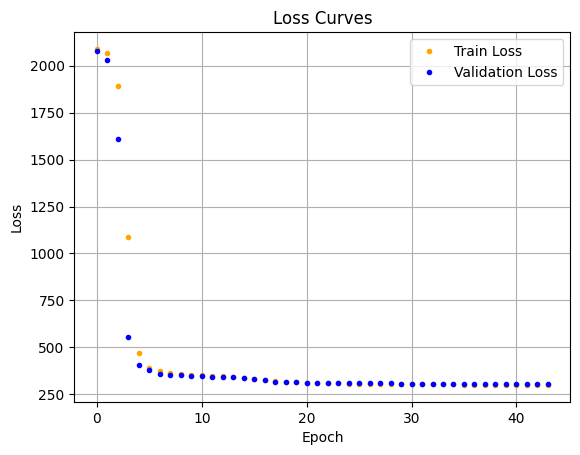


Epoch 44
---------


Train Loss: 300.5817 -|- Validation Loss: 305.6482 -|- Epoch Time: 701.4518 seconds


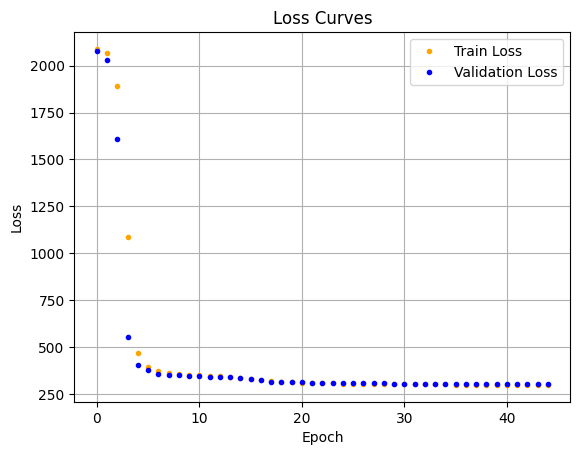


Epoch 45
---------


Train Loss: 300.3241 -|- Validation Loss: 303.6991 -|- Epoch Time: 701.4892 seconds


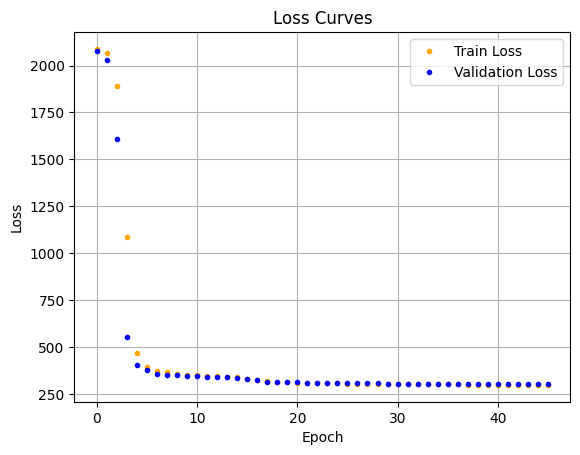


Epoch 46
---------


Train Loss: 300.2860 -|- Validation Loss: 303.6193 -|- Epoch Time: 701.5404 seconds


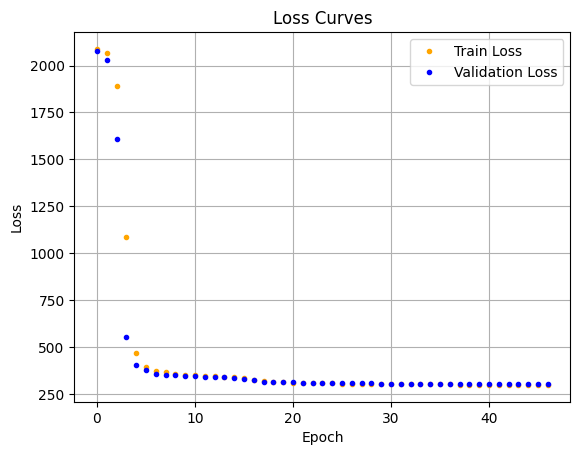


Epoch 47
---------


Train Loss: 300.1087 -|- Validation Loss: 303.7240 -|- Epoch Time: 701.6130 seconds


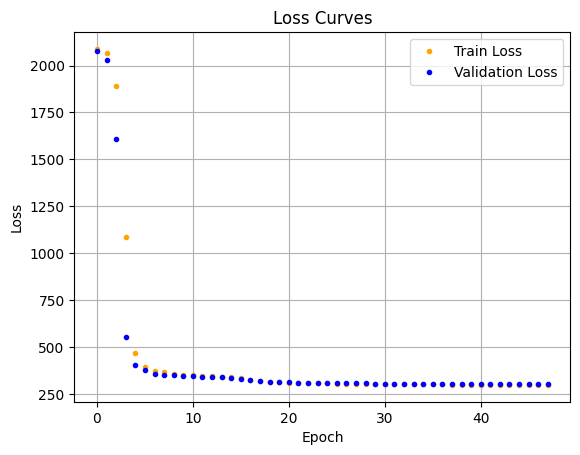


Epoch 48
---------


Train Loss: 299.6513 -|- Validation Loss: 303.9728 -|- Epoch Time: 701.6805 seconds


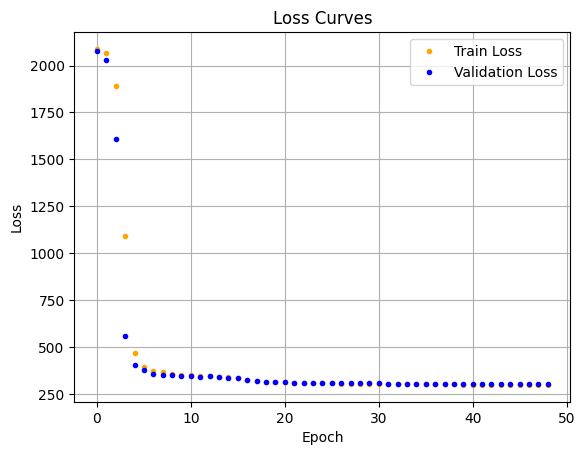


Epoch 49
---------


Train Loss: 299.5836 -|- Validation Loss: 303.4289 -|- Epoch Time: 701.6029 seconds


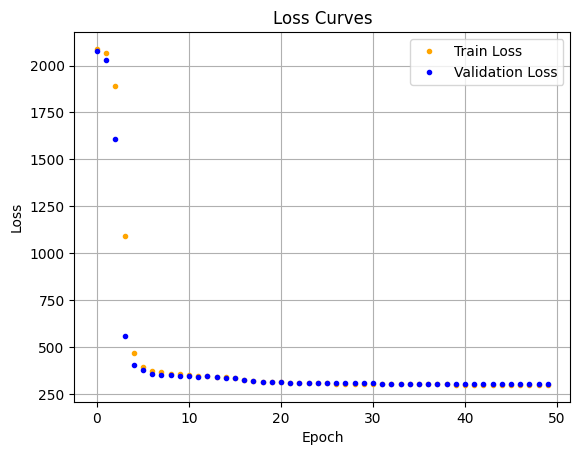

In [8]:
import numpy as np
import matplotlib.pyplot as plt

torch.cuda.empty_cache()

model = model.to('cuda')


train_loss_list = np.array([])
val_loss_list = np.array([])

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    start = time.time()
    train_loss = train_model(train_loader, model, loss_function, optimizer, device='cuda')
    validation_loss = validate_model(val_loader, model, loss_function, device='cuda')
    end = time.time()
    epoch_time = end - start
    train_loss_list = np.append(train_loss_list, train_loss)
    val_loss_list = np.append(val_loss_list, validation_loss)
    print(f'Train Loss: {train_loss:0.4f} -|- Validation Loss: {validation_loss:0.4f} -|- Epoch Time: {epoch_time:0.4f} seconds')
    plt.plot(range(len(train_loss_list)),train_loss_list, '.', c='orange', label='Train Loss')
    plt.plot(range(len(train_loss_list)),val_loss_list, '.', c='blue', label='Validation Loss')
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    #plt.savefig(f'Animations/Training_2Stack_{ix_epoch}.png')
    plt.show()
    print()

In [9]:
# Save the entire model (not recommended for production)
torch.save(model, 'Models/Model_3.pth')

R² Score: 0.1376


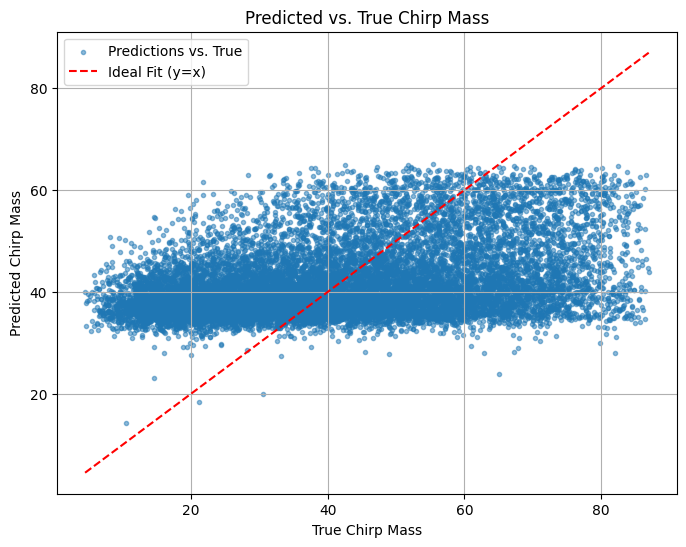

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Set model to evaluation mode
model.eval()

# Store results
predictions = []
true_labels = []

# Disable gradients for evaluation
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to('cuda'), y_test.to('cuda')

        # Get predictions
        outputs = model(X_test)

        # Store predictions and true labels
        predictions.append(outputs.cpu().numpy())
        true_labels.append(y_test.cpu().numpy())

# Convert lists to numpy arrays
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

# Calculate and plot the R^2
r2 = r2_score(true_labels, predictions)
print(f"R² Score: {r2:.4f}")

# --- PLOTTING ---
plt.figure(figsize=(8, 6))
plt.scatter(true_labels, predictions, marker='.', alpha=0.5, label="Predictions vs. True")
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'r--', label="Ideal Fit (y=x)")
plt.xlabel("True Chirp Mass")
plt.ylabel("Predicted Chirp Mass")
plt.title("Predicted vs. True Chirp Mass")
plt.legend()
plt.grid(True)
plt.savefig("(3)_Media/Model_3_Performance.png")
plt.show()

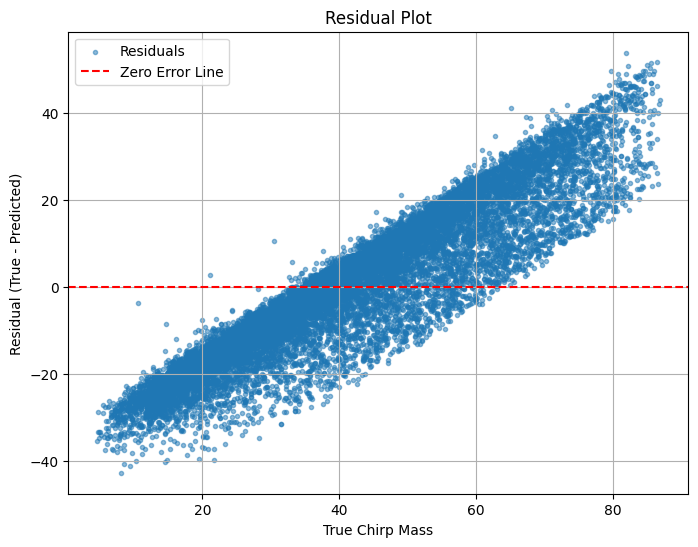

In [18]:
residuals = true_labels - predictions.transpose()

plt.figure(figsize=(8, 6))
plt.scatter(true_labels, residuals, marker='.', alpha=0.5, label="Residuals")
plt.axhline(y=0, color='r', linestyle='--', label="Zero Error Line")
plt.xlabel("True Chirp Mass")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residual Plot")
plt.legend()
plt.grid(True)
plt.savefig('(3)_Media/Model_3_Performance_Residual.png')
plt.show()

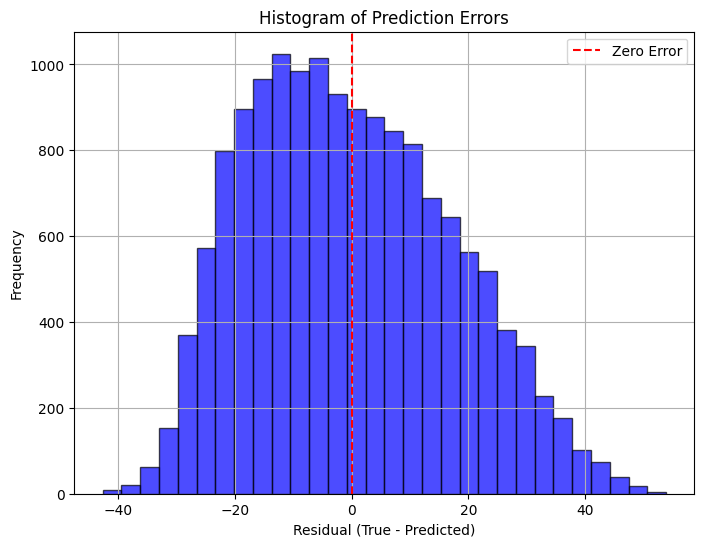

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(residuals.transpose(), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label="Zero Error")
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.grid(True)
plt.savefig('(3)_Media/Model_3_Performance_Residual_Histogram.png')
plt.show()